In [55]:
import os
import subprocess

import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [56]:
#Incarcare dataset
input_file = "data_banknote_authentication.txt"
data = pd.read_csv(input_file, header = 0)

array = data.values
X = array[:,0:4]
Y = array[:,4]

In [57]:
data

,WaveletVar,WaveletSkew,WaveletKurt,ImgEntropy,Authenticity
0,4.54590,8.1674,-2.45860,-1.46210,0
1,3.86600,-2.6383,1.92420,0.10645,0
2,3.45660,9.5228,-4.01120,-3.59440,0
3,0.32924,-4.4552,4.57180,-0.98880,0
4,4.36840,9.6718,-3.96060,-3.16250,0
...,...,...,...,...,...
1365,-2.41000,3.7433,-0.40215,-1.29530,1
1366,0.40614,1.3492,-1.45010,-0.55949,1
1367,-1.38870,-4.8773,6.47740,0.34179,1
1368,-3.75030,-13.4586,17.59320,-2.77710,1


In [58]:
data.shape

(1370, 5)

In [59]:
data.columns

Index(['WaveletVar', 'WaveletSkew', 'WaveletKurt', 'ImgEntropy',
       'Authenticity'],
      dtype='object')

In [60]:
#Primele 5 inregistrari
data.head()

,WaveletVar,WaveletSkew,WaveletKurt,ImgEntropy,Authenticity
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [61]:
data.dtypes

WaveletVar      float64
WaveletSkew     float64
WaveletKurt     float64
ImgEntropy      float64
Authenticity      int64
dtype: object

In [62]:
#Features
X

array([[  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       [  3.4566 ,   9.5228 ,  -4.0112 ,  -3.5944 ],
       ...,
       [ -1.3887 ,  -4.8773 ,   6.4774 ,   0.34179],
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ]])

In [63]:
#Target
Y

array([0., 0., 0., ..., 1., 1., 1.])

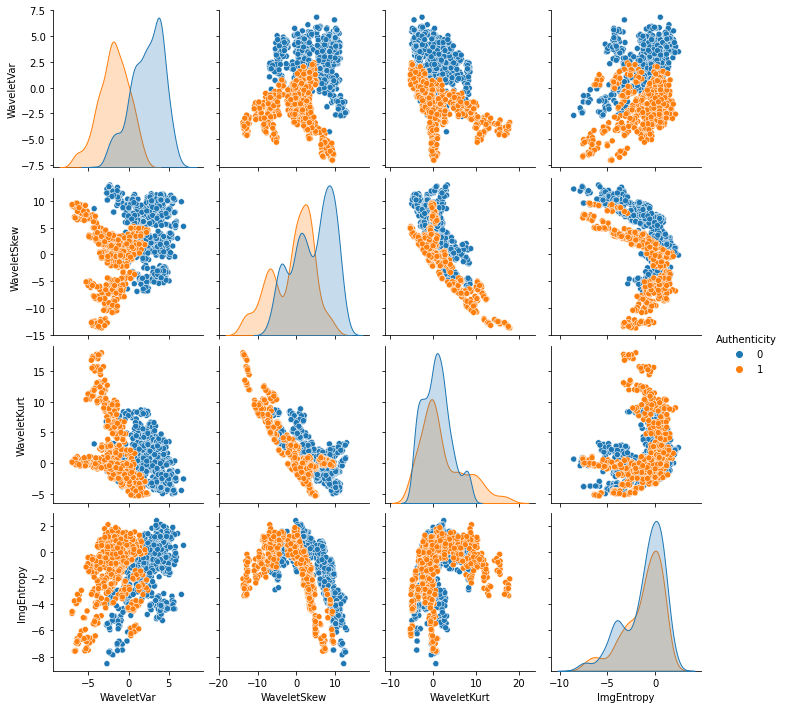

In [64]:
#Data exploration
import seaborn
import matplotlib.pyplot as plt
  
seaborn.pairplot(data, hue ='Authenticity')
plt.show()

<AxesSubplot:title={'center':'Numar de bancnote autentice/false'}>

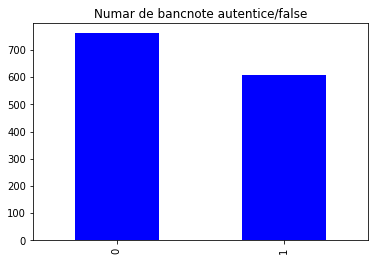

In [65]:
#Data exploration
#1=nr bancnote falsificate
#0=nr bancnote autentice
data.Authenticity.value_counts().plot(kind="bar",color="blue",title="Numar de bancnote autentice/false")

In [66]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [67]:
#Impartire dataset: train + test
#Fit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 0)
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [68]:
#Prezicere raspuns pentru dataset
#Predict
Y_prediction = model.predict(X_test)
print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)

Y:  [0. 0. 0. ... 1. 1. 1.]
Y_prediction: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.]
Y_test: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.

In [70]:
#Testare estimator pe 2 exemple concrete
#prima inregistrare ar trebui sa aiba valoarea 0, a doua valoarea 1
my_test= [[3.6216,8.6661,-2.8073,-0.44699],[-2.5419,-0.65804,2.6842,1.1952]]
Y_prediction_test= model.predict(my_test)
print("Prediction form my given test:",Y_prediction_test)

Prediction form my given test: [0. 1.]


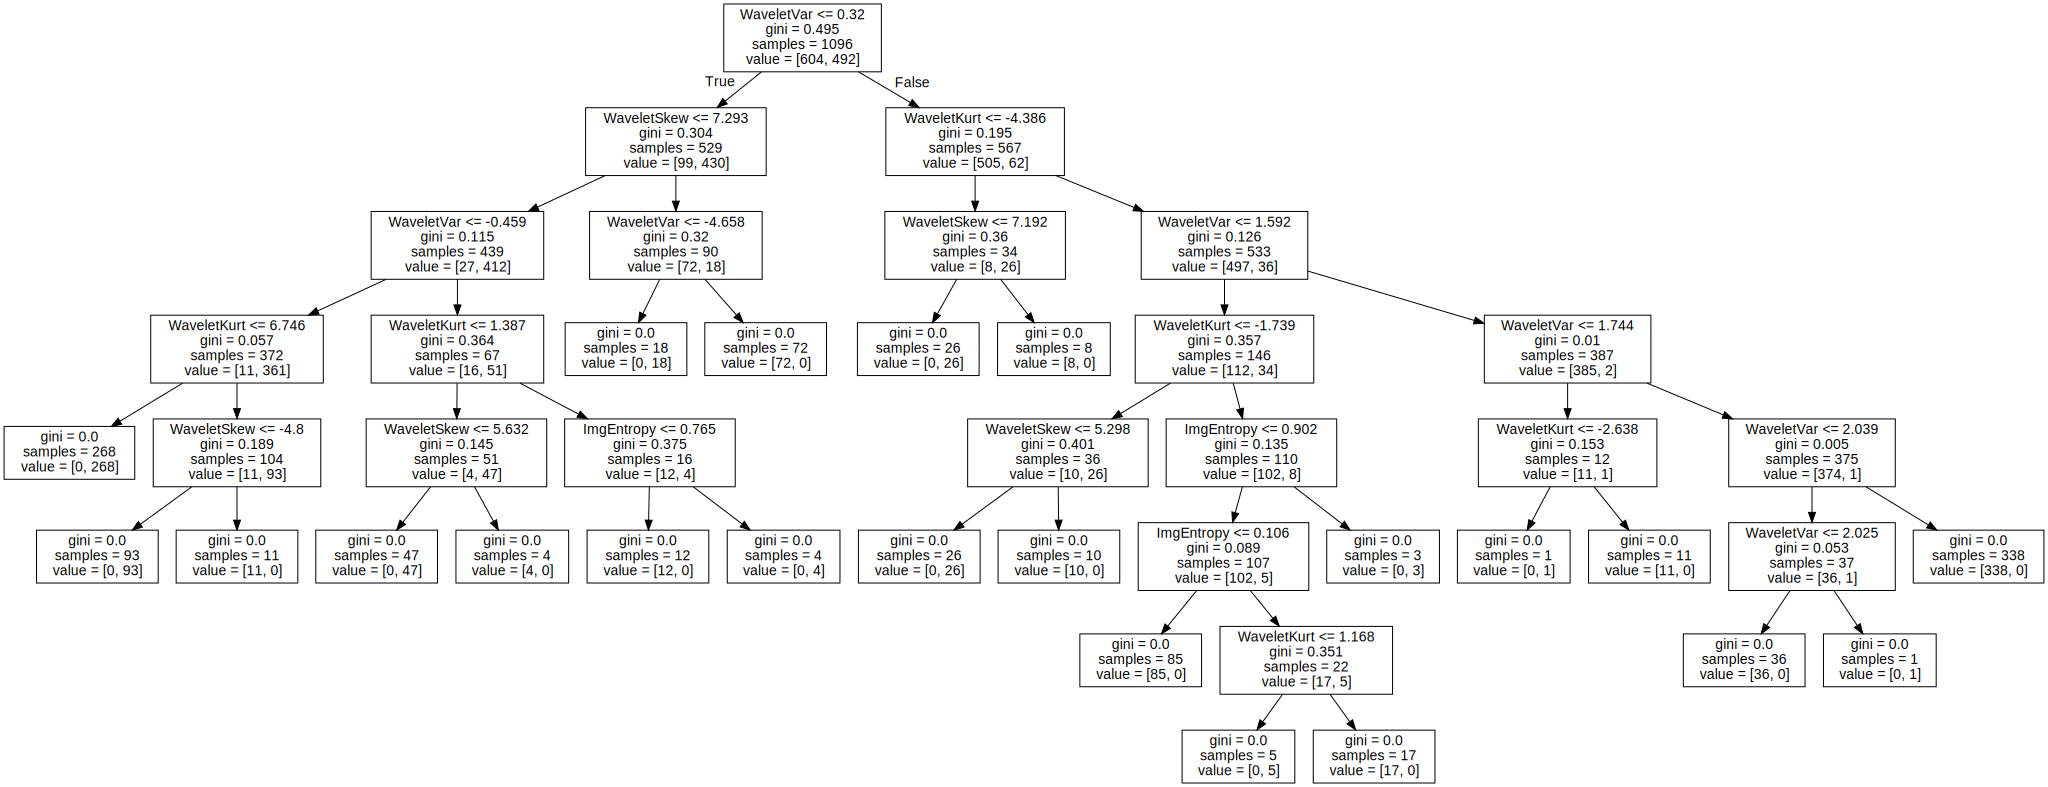

In [71]:
import graphviz
Z= data[data.columns.drop('Authenticity')]
dot_data = tree.export_graphviz(model, out_file = None, feature_names= Z.columns)
graph1 = graphviz.Source(dot_data)
graph1


In [72]:
#5 metrici pentru clasificatorul initial
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score=f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

Accuracy: 0.9781021897810219
Confusion matrix is :  [[154   3]
 [  3 114]]
Recall_score is : 0.9743589743589743
Precision Score is :  0.9743589743589743
f1 Score is :  0.9743589743589743


In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train,Y_train,cv=5)  

array([0.98636364, 0.98173516, 0.98630137, 0.97260274, 0.98630137])

In [74]:
#GridSearch pentru imbunatatire rezultate-cautarea celor mai bune valori pentru parametri
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'),'splitter':('best', 'random') ,'max_depth':range(1,21),'min_samples_split':range(2,11)}
model3 = tree.DecisionTreeClassifier()
clf = GridSearchCV(model3, parameters)
clf.fit(X, Y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(1, 21),
                         'min_samples_split': range(2, 11),
                         'splitter': ('best', 'random')})

In [75]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 5,
 'splitter': 'random'}

In [76]:
clf.cv_results_

{'mean_fit_time': array([0.00434823, 0.00239811, 0.00255647, 0.00113907, 0.00208917,
        0.00117311, 0.00219202, 0.00122776, 0.00209007, 0.00132618,
        0.00206747, 0.00107098, 0.00195117, 0.0011025 , 0.00201845,
        0.00111294, 0.00199113, 0.00114651, 0.0029479 , 0.00108662,
        0.00291624, 0.00122142, 0.00286932, 0.00116076, 0.00287199,
        0.00116539, 0.00285778, 0.00116239, 0.00334563, 0.00132351,
        0.00291781, 0.00132327, 0.00293899, 0.00122623, 0.00293341,
        0.00119953, 0.00378251, 0.0012569 , 0.00392442, 0.00127931,
        0.0037683 , 0.00137625, 0.0037674 , 0.00124626, 0.00376148,
        0.00123601, 0.00373187, 0.00123377, 0.00375576, 0.00146494,
        0.00392699, 0.00140467, 0.00373979, 0.00122533, 0.00444069,
        0.00133133, 0.00446091, 0.00138454, 0.00442433, 0.00140796,
        0.00472345, 0.00153408, 0.00472016, 0.00148292, 0.00456357,
        0.00133839, 0.00452914, 0.00169721, 0.00511293, 0.00141368,
        0.00480628, 0.00131917,

# Schimbare parametrii pentru a imbunatati performanta

In [77]:
from sklearn.metrics import f1_score
#Schimbare parametrii pentru a imbunatati performanta
#Valorile pentru parametrii sunt cei gasiti de GridSearch

clf.fit(X_train,Y_train)
Y_prediction = clf.predict(X_test)
print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)
print("Metricile dupa setarea parametrilor optimi:")
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

Y:  [0. 0. 0. ... 1. 1. 1.]
Y_prediction: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.]
Y_test: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.

In [78]:
#Cross-validation pentru modelul cu parametrii gasiti de GridSearch
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X,Y,cv=2)

array([0.97226277, 0.99270073])

# Vizualizare rezultate obtinute cu parametri diferiti

Text(0, 0.5, 'Accuracy')

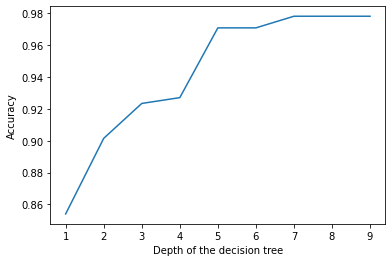

In [79]:
#Vizualizare rezultate obtinute cu parametri diferiti
%matplotlib inline
import matplotlib.pyplot as plt
scores = {}
scores_list = []
#Parametrul max_depth variaza intre 1-10
maxdepth=range(1,10)

for k in maxdepth:
   classifier = tree.DecisionTreeClassifier(max_depth=k)
   classifier.fit(X_train, Y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,y_pred)
   scores_list.append(metrics.accuracy_score(Y_test,y_pred))

plt.plot(maxdepth,scores_list)
plt.xlabel("Depth of the decision tree")
plt.ylabel("Accuracy")

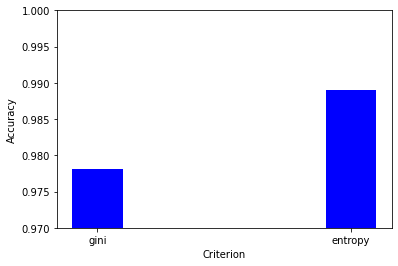

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
scores = {}
scores_list = []
#Parametrul max_depth variaza intre 2-6
criterion=["gini","entropy"]

for k in criterion:
   classifier = tree.DecisionTreeClassifier(criterion=k)
   classifier.fit(X_train, Y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,y_pred)
   scores_list.append(metrics.accuracy_score(Y_test,y_pred)) 

plt.bar(criterion,scores_list,width=0.2,color='blue')
plt.xlabel("Criterion")
plt.ylabel("Accuracy")
plt.ylim((0.97,1))
plt.show()

